In [53]:
import numpy as np
import h5py
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
f = h5py.File("../data/contractor_data.hdf5", "r")

In [55]:
xdat = xr.DataArray(f["errors"][:, :], dims=("size", "chi"), \
                    coords={"size": f["sizes"][:], "chi": f["chis"][:]}, name="errors")
df = xdat.to_dataframe()

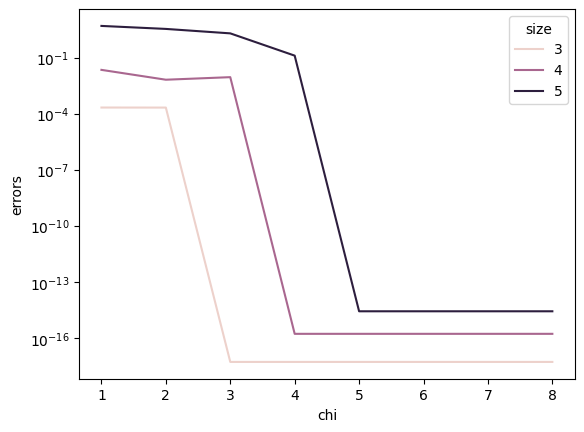

In [65]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(data=df, x="chi", y="errors", markers=["."], hue="size")
plt.savefig("../data/contractor_error_plot.pdf")

In [61]:
speedups = f["my_times"][:]
print(type(speedups))
for i in range(f["quimb_times"][:].size):
    speedups[i, :] = speedups[i, :] / f["quimb_times"][i]

xdat2 = xr.DataArray(speedups, dims=("size", "chi"), \
                    coords={"size": f["sizes"][:], "chi": f["chis"][:]}, \
                    name="speedups")
df2 = xdat2.to_dataframe()

<class 'numpy.ndarray'>


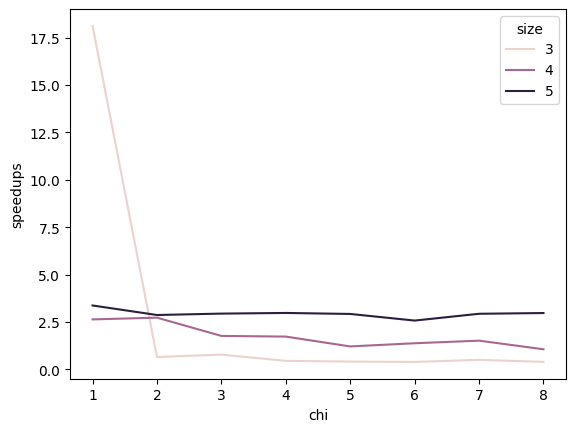

In [66]:
fig2, ax2 = plt.subplots()
sns.lineplot(data=df2, ax=ax2, x="chi", y="speedups", hue="size")
plt.savefig("contractor_speedup_plot.pdf")

In [48]:
f.close()